In [124]:
from pathlib import Path
import glob
import imageio
import numpy as np
from matplotlib import pyplot as plt
import math
%matplotlib notebook

What we can see in the cell below is the format our images are in.  Our testing data has a 4th color channel for alpha and both images seem to have vastly different dimmension.  Continue on to visualize the images and see where we can remove padding for preprocessing.  Train data is (160,96,4) and test data is (240,320,3).  Both of these should be about (128,64,3)

(160, 96, 4)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(240, 320, 3)


<IPython.core.display.Javascript object>


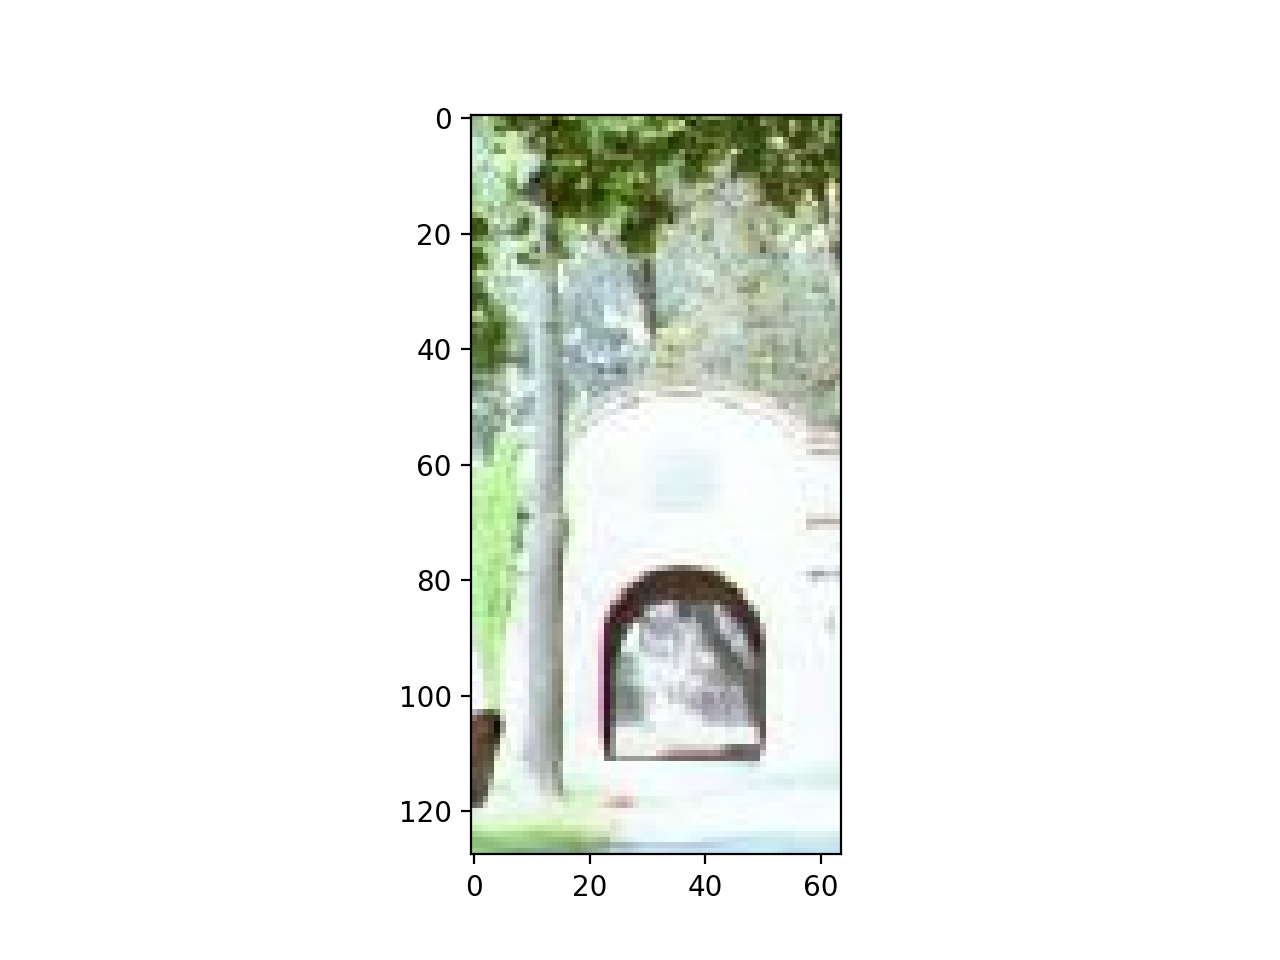

In [125]:
path = Path("./INRIAPerson/train_64x128_H96/pos/crop001015b.png")
path2 = Path("./INRIAPerson/train_64x128_H96/neg/00000010a.png")
data = imageio.imread(path)
data2 =  imageio.imread(path2)
print(data.shape)
print(data[:,:,3])
print(data2.shape)
plt.imshow(data2)

According to the website for this dataset - In both folders, use the centered 64x128 pixels window for original detection task. Let's try

In [126]:
h = 128
w = 64
diff_h = int((data.shape[0] - h) / 2.0)
diff_w = abs(int((data.shape[1] - w) / 2.0))
diff_h2 = int((data2.shape[0] - h) / 2.0)
diff_w2 = abs(int((data2.shape[1] - w) / 2.0))
data = data[diff_h:(-diff_h), diff_w: (-diff_w),:-1]
data.shape

data2 = data2[diff_h2:(-diff_h2), diff_w2: (-diff_w2)]

In [127]:
plt.imshow(data2)

# Actually loading data below

In [128]:
train_data = np.empty((50000,128,64,3))
train_labels = np.empty((50000, ))
h = 128
w = 64

In [129]:
for ind, image_path in enumerate(glob.glob("./INRIAPerson/train_64x128_H96/pos/*.png")):
    temp = imageio.imread(image_path)
    diff_h = abs(int((temp.shape[0] - h) / 2.0))
    diff_w = abs(int((temp.shape[1] - w) / 2.0))
    train_data[ind] = temp[diff_h:(-diff_h), diff_w: (-diff_w),:-1]
    train_labels[ind] = 1

In [130]:
total_pos = 2416

In [131]:
for ind, image_path in enumerate(glob.glob("./INRIAPerson/train_64x128_H96/neg/*.png")):
    temp = imageio.imread(image_path)
    diff_h = abs(int((temp.shape[0] - h) / 2.0))
    diff_w = abs(int((temp.shape[1] - w) / 2.0))
    temp = temp[diff_h:(-diff_h), diff_w: (-diff_w)]
    train_labels[ind + total_pos] = 0
    train_data[ind + total_pos] = temp[:128, :64, :3]

In [133]:
total_data_points = ind + 2416
total_data_points = 3327
train_data = train_data[:total_data_points + 1]
train_labels = train_labels[:total_data_points + 1]

In [135]:
np.save("./xtrain.npy",train_data)
np.save( "./xtest.npy", train_labels)

## Now the same thing will be done for our nice test data


In [146]:
test_data = np.empty((50000,128,64,3))
test_labels = np.empty((50000, ))
h = 128
w = 64
for ind, image_path in enumerate(glob.glob("./INRIAPerson/test_64x128_H96/pos/*.png")):
    temp = imageio.imread(image_path)
    diff_h = abs(int((temp.shape[0] - h) / 2.0))
    diff_w = abs(int((temp.shape[1] - w) / 2.0))
    test_data[ind] = temp[diff_h:(-diff_h), diff_w: (-diff_w),:-1]
    test_labels[ind] = 1
total_pos = ind

In [147]:
for ind, image_path in enumerate(glob.glob("./INRIAPerson/test_64x128_H96/neg/*.png")):
    temp = imageio.imread(image_path)
    diff_h = abs(int((temp.shape[0] - h) / 2.0))
    diff_w = abs(int((temp.shape[1] - w) / 2.0))
    temp = temp[diff_h:(-diff_h), diff_w: (-diff_w)]
    test_labels[ind + total_pos] = 0
    test_data[ind + total_pos] = temp[:128, :64, :3]

In [142]:
total_data_points = ind + total_pos
test_data = train_data[:total_data_points + 1]
test_labels = train_labels[:total_data_points + 1]

In [145]:
np.save("./xtest.npy",test_data)
np.save( "./xtrain.npy", test_labels)

Images are already normalized so this code should be sufficient.
The central 128, 64 pixels are taken and saved as np objects.
A lot of this is pretty prototpye drive code and so there are dangers that running a cell multiple times will cause, best bet is to run all the way through the code in one fail swoop.  Now that the data is saved in the right format with all the labels the next step will be to shuffle the data so that batches can be used in the SVM.

Additionally, we may want to subtract the mean image from the data for better results